<a href="https://colab.research.google.com/github/icetiger410-cpu/Machine_Learning/blob/main/Classification_MNIST_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1 09.12.2025





In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml(data_id=554,as_frame=False)

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist


In [ ]:
X=mnist['data']

In [ ]:
y=mnist['target']

In [ ]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
X[0].shape

(784,)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X.shape

(70000, 784)

In [ ]:
print(X[0].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
import matplotlib.pyplot as plt

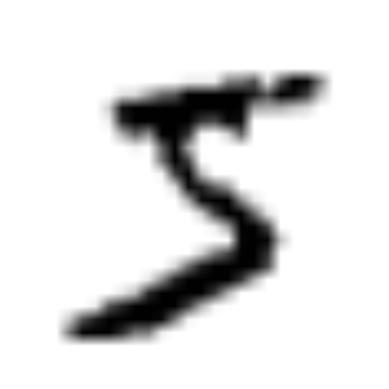

In [ ]:
def digit_image(num_image):
  num_image_reshaped=num_image.reshape(28,28)
  plt.imshow(num_image_reshaped,cmap='binary',interpolation='bilinear')
  plt.axis('off')
some_digit=X[0]
digit_image(some_digit)

In [ ]:
y[0]

'5'

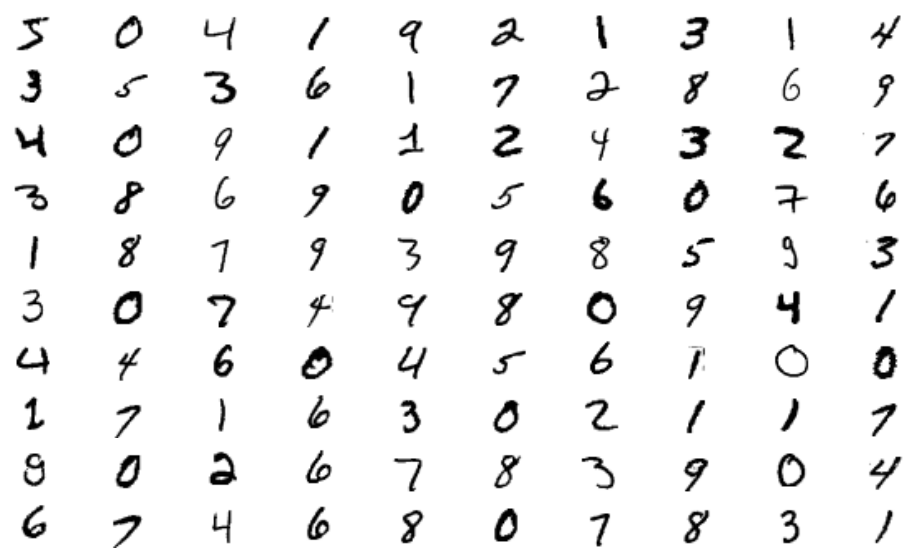

In [ ]:
plt.figure(figsize=(12,7))
for idx,image in enumerate(X[:100]):
  plt.subplot(10,10,idx+1)
  digit_image(image)

In [ ]:
X_train=X[:60000]
y_train=y[:60000]
X_test=X[60000:]
y_test=y[60000:]

In [ ]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [ ]:
y_train=='5'

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
sgd_clf=SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
t=[0.95035, 0.96035, 0.9604]

In [ ]:
np.mean(t)

np.float64(0.9570333333333334)

In [ ]:
sgd_clf.score(X_test,y_test_5)

0.9492

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
1-(sum(y_train=='5')/len(y_train))

np.float64(0.90965)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))


False


In [ ]:
dummy_clf.score(X_test,y_test_5)

0.9108

In [ ]:
len(y_train_5)-sum(y_train_5)

np.int64(54579)

PART 2 12.12.2025

In [ ]:
cross_val_score(dummy_clf,X_train,y_train,cv=3)

array([0.11235, 0.11235, 0.1124 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
preds

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,preds)
cm

array([[53892,   687],
       [ 1891,  3530]])

Accurracy, Precision, Recall, Harmonical mean(F1)
**Precision - modelin dogru deye isarelediyi samplelardan necesi heqiqeten dogrudur **
** Recall - heqiqeten dogrulardan necesini heqiqeten dogru olaraq isarelemisdir **

Recall artdiqca Precision azalir

f1 score --> recall ve precisionun harmonik ortalamasidir --> tibbde recall and f1 score are more important


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_train_5,preds)*100

83.70879772350011

In [ ]:
recall_score(y_train_5,preds)*100

65.11713705958311

In [ ]:
f1_score(y_train_5,preds)*100

73.25171197343847

TRADE OFF, TRESHOLDS AND ETS.

In [ ]:
y_scores= sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
treshold=0

In [ ]:
y_some_digit_pred=(y_scores>treshold)

In [ ]:
y_some_digit_pred

array([ True])

In [ ]:
y_scores=cross_val_predict(sgd_clf,X_train, y_train_5,cv=3,method='decision_function')


In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

Tradeoff da precision ve recall in bir biri ile elaqesini gormek isteyirik

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions,recalls,tresholds=precision_recall_curve(y_train_5,y_scores)

In [ ]:
tresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

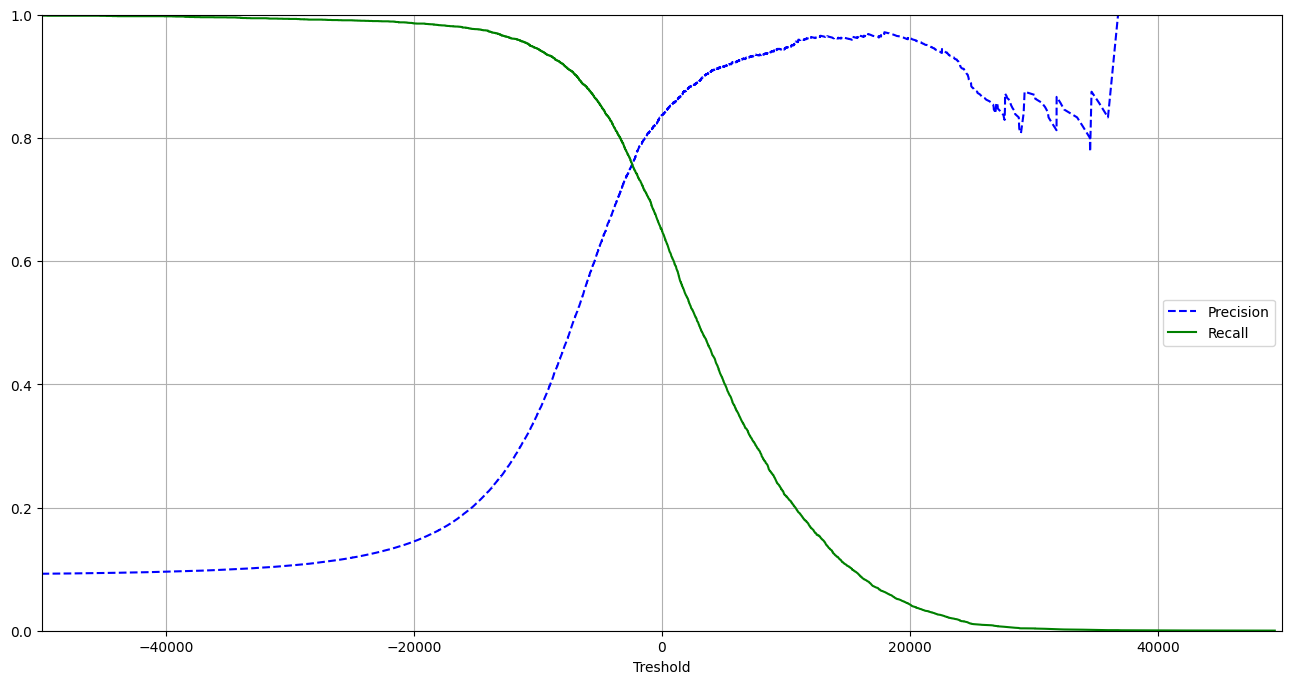

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(tresholds,precisions[:-1],'b--',label='Precision')
plt.plot(tresholds,recalls[:-1],'g-',label='Recall')
plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc='center right')
plt.show()

In [ ]:
# choose point for 90% of precision

idx_for_90_precision=(precisions>0.90).argmax() #argmax - max qiymeti qaytarir
treshold_for_90_precision=tresholds[idx_for_90_precision]
treshold_for_90_precision

np.float64(3370.0194991439557)

In [ ]:
#experimental

idx_for_equal_precision=(precisions==recalls).argmax() #ikisinin kesismesini tapiriq
tresholds_for_equals=tresholds[idx_for_equal_precision]
tresholds_for_equals

np.float64(-2379.064500932274)

In [ ]:
#experimental
precisions[idx_for_equal_precision],recalls[idx_for_equal_precision] #

(np.float64(0.7572403615569083), np.float64(0.7572403615569083))

In [ ]:
y_train_pred_90= (y_scores>= treshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5,y_train_pred_90)
#

0.9000345901072293

In [ ]:
recall_at_90_precision=recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision
#

0.4799852425751706

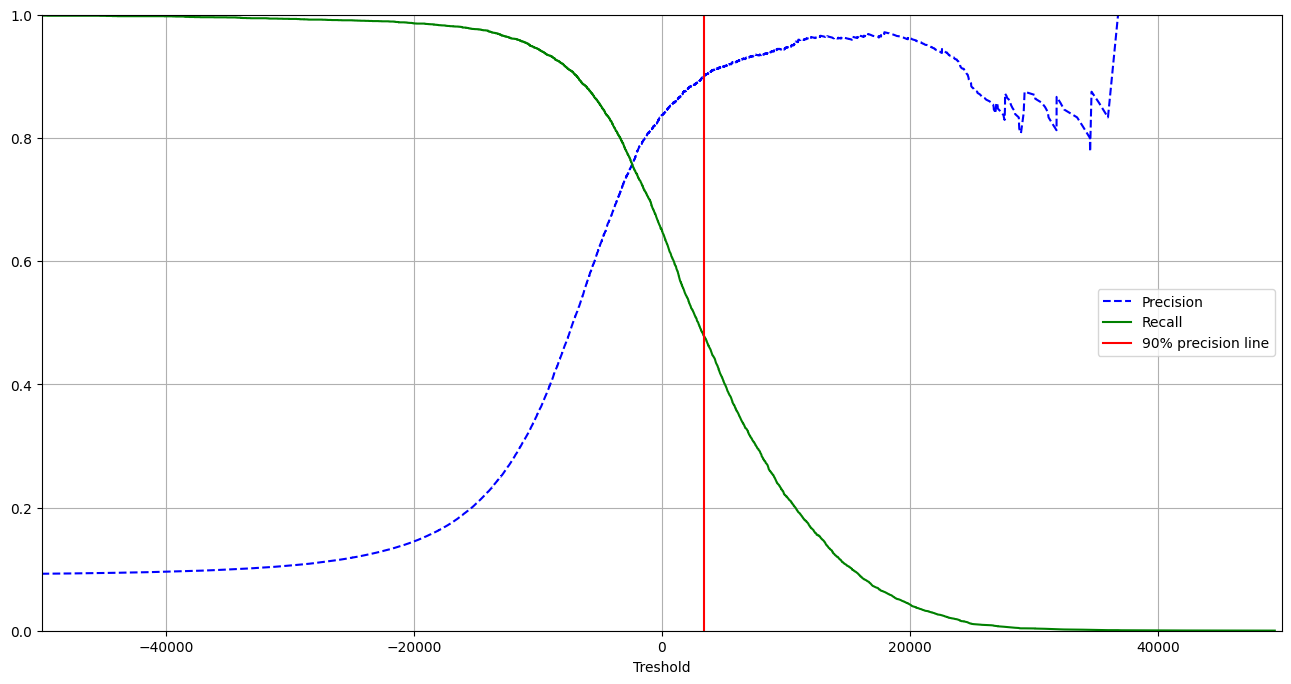

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(tresholds,precisions[:-1],'b--',label='Precision')
plt.plot(tresholds,recalls[:-1],'g-',label='Recall')
plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Treshold')
plt.axvline(x=treshold_for_90_precision,ymin=0,ymax=1,color='r',label='90% precision line')
plt.legend(loc='center right')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,tresholds=roc_curve(y_train_5,y_scores)

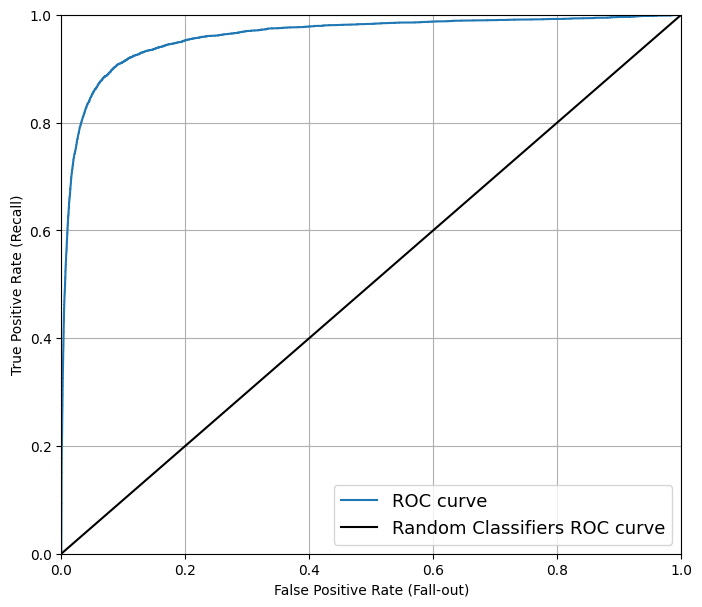

In [ ]:
#recall ne qeder sola yaxin olsa o qeder yaxsidi

plt.figure(figsize=(8,7))
plt.plot(fpr,tpr,label= 'ROC curve')
plt.plot([0,1],[0,1],'k',label= 'Random Classifiers ROC curve')
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc='lower right',fontsize=13)
plt.show()


In [ ]:
pd.value_counts(y)

/tmp/ipython-input-3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


,count
1,7877
7,7293
3,7141
2,6990
9,6958
0,6903
6,6876
8,6825
4,6824
5,6313


In [ ]:
from sklearn.metrics import roc_auc_score #AUC - area under cover
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

PART 3 - 15.12.2025

Desicion function -


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest=cross_val_predict(forest_clf,
                                  X_train,
                                  y_train_5,
                                  cv=3,
                                  method='predict_proba')#faiz gosterir(solda deyil,
                                  #sagda odur kimi deyir)

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest=y_probas_forest[:,1]
precision_forest,recalls_forest,tresholds_forest=precision_recall_curve(
    y_train_5,y_scores_forest)



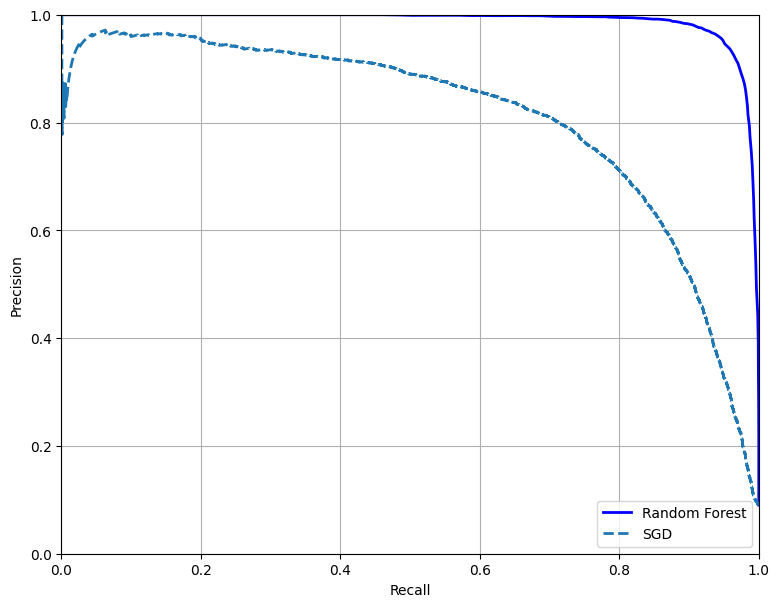

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(recalls_forest,precision_forest,'b-',linewidth=2,label='Random Forest')
plt.plot(recalls,precisions,'--',linewidth=2,label='SGD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc='lower right');
plt.show()

In [ ]:
y_train_pred_forest=y_probas_forest[:,1]>=0.5
f1_score(y_train_5,y_train_pred_forest)


0.9274509803921569

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983436731328145)

In [ ]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

PART 4 17.12.2025 MULTI CLASSIFICATION

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])


array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])

some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

'5'

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()


array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

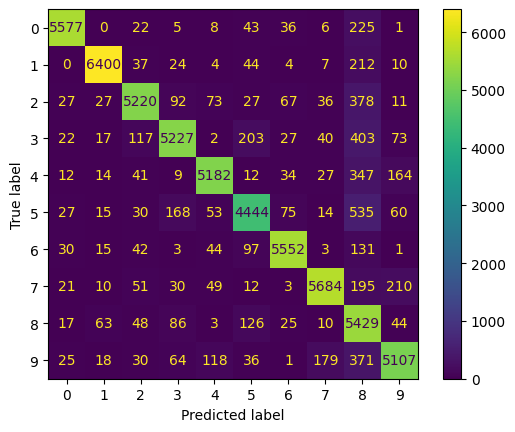

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

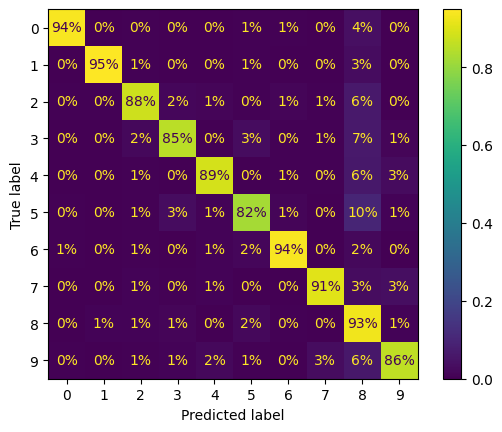

In [ ]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize='true', values_format='.0%')
plt.show()

PART 5 19.12.2025 MULTILABEL CLASSIFICATION


In [ ]:
y_train[-1]

'8'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train.astype('int8')>=7)
y_train_odd = (y_train.astype('int8')%2==1) #iki label yaratdiq
y_multilabel = np.c_[y_train_large, y_train_odd] #np.c_ --> bu labelleri birlesdiririk
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
pd.DataFrame(y_multilabel,columns=['is greater than seven?','is odd'])

,is greater than seven?,is odd
0,False,True
1,False,False
2,False,False
3,False,True
4,True,True
...,...,...
59995,True,False
59996,False,True
59997,False,True
59998,False,False


In [ ]:
knn_clf.predict(X_train[:3])

array([[False,  True],
       [False, False],
       [False, False]])

In [ ]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [ ]:
f1_score(y_multilabel,y_train_knn_pred,average='macro') #

0.9764102655606048

PART 6 19.12.2025 MULTIOUTPUT CLASSIFICATION

In [ ]:
import random

In [ ]:
np.random.seed(42)
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

In [ ]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

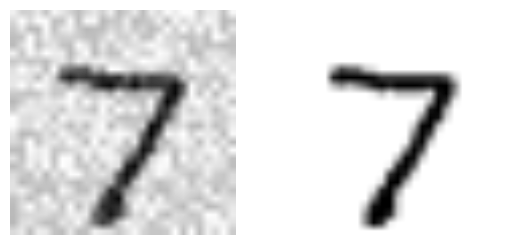

In [ ]:
plt.subplot(121);
digit_image(X_test_mod[0])
plt.subplot(122);
digit_image(y_test_mod[0])
plt.show()

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train)

KNeighborsClassifier()

In [ ]:
baseline_accuracy=knn_clf.score(X_test,y_test)
baseline_accuracy

0.9332